# Visualization Using Seaborn of a Telecom Churn Dataset #

### Load Libraries  ###

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

### Let's load up the dataset and prepare the dataframe ###

In [3]:
churn_df = pd.read_csv('churn.csv')
col_names = churn_df.columns.tolist()

print("Column names:")
print(col_names)

to_show = col_names[:6] + col_names[-6:]

#print "\nSample data:"
#churn_df[to_show].head(6)
churn_df.head(10)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)
churn_df['churn'] = y

# We don't need these columns
#to_drop = ['State','Area Code','Phone','Churn?']
to_drop = ['Churn?']
new_churn_df = churn_df.drop(to_drop,axis=1)

# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
new_churn_df[yes_no_cols] = new_churn_df[yes_no_cols] == 'yes' #np.where(churn_df[yes_no_cols]=='yes',1,0) 

# Pull out features for future use
features = new_churn_df.columns

In [5]:
new_churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Choose a Variable and Plot Four Ways ###

Use the continuous variable 'Day Charge'

In [ ]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)



# Draw a nested violinplot and split the violins for easier comparison


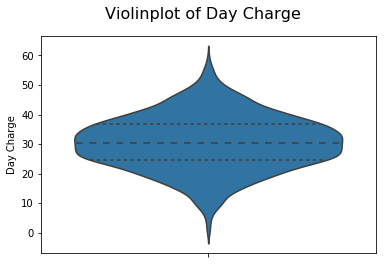

In [18]:
plt.suptitle('Violinplot of Day Charge', fontsize=16)
sns.violinplot(y=new_churn_df['Day Charge'], split=True, inner="quart")

Pro: Shows nice kernel density estimate of variable's distribution.  Includes median and quartile lines.
Cons: Cannot easily see outliers

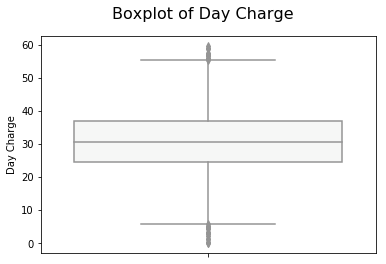

In [19]:
plt.suptitle('Boxplot of Day Charge', fontsize=16)
sns.boxplot(y=new_churn_df['Day Charge'], palette="PRGn")

Pro: Easily see Outliers and interquartile range in an abstract manner.

Cons: Harder to visualize actual look of the density of the data.

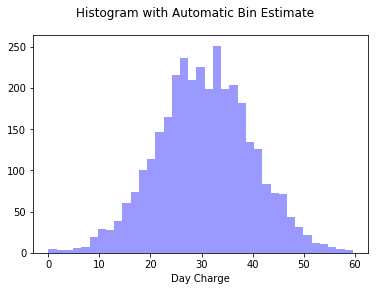

In [22]:
plt.suptitle('Histogram with Automatic Bin Estimate')
sns.distplot(new_churn_df['Day Charge'], kde=False, color="b")

Pro: Nice automatic bin sizing applied to histogram.
    
Cons: Can be a little rough as to shape compared to KDE.

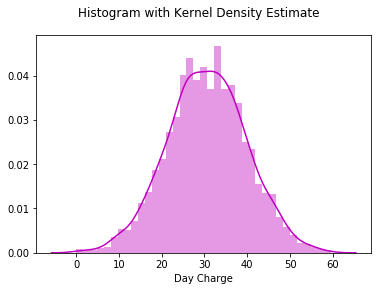

In [20]:
plt.suptitle('Histogram with Kernel Density Estimate')
sns.distplot(new_churn_df['Day Charge'], color="m")

Pro: Includes two types of density plot in one.

Cons: None that I know of.

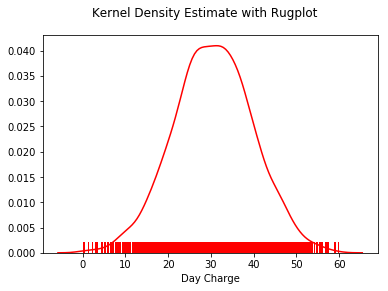

In [25]:
plt.suptitle('Kernel Density Estimate with Rugplot')
sns.distplot(new_churn_df['Day Charge'], hist=False, rug=True, color="r")

Pro: Gives you a nice KDE along with plotting the rug (locations of actual data points)

Cons:  Hard to see quartiles for some distributions.
    

### Plot Two Continuous Variables Three Different Ways ###

We will use "Night Mins" and "Day Mins"

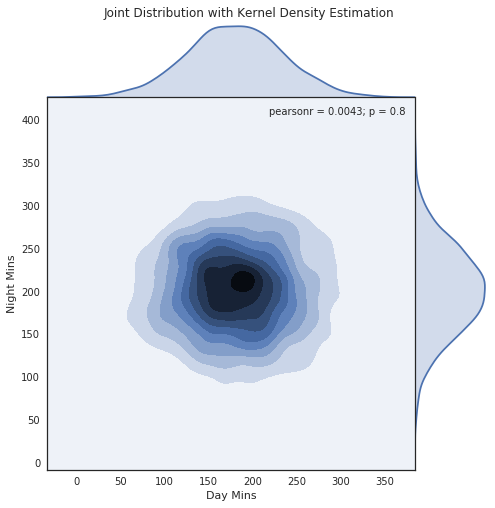

In [6]:
sns.set(style="white")
# Show the joint distribution using kernel density estimation

g = sns.jointplot(new_churn_df['Day Mins'],new_churn_df['Night Mins'], kind="kde", size=7, space=0)
plt.suptitle('Joint Distribution with Kernel Density Estimation',fontsize=12,verticalalignment='bottom')
plt.show()

Pros: Contains a lot of useful info in one plot.  I like the marginal Kernel
Density Estimators on the side and top.

Cons: Hard to see outliers.

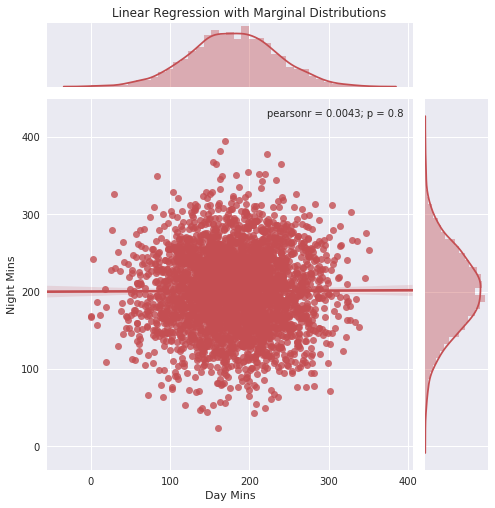

In [7]:
sns.set(style="darkgrid", color_codes=True)


g = sns.jointplot(new_churn_df['Day Mins'],new_churn_df['Night Mins'], kind="reg", color="r", size=7)
plt.suptitle('Linear Regression with Marginal Distributions',fontsize=12,verticalalignment='bottom')
plt.show()

Pros: Contains a scatterplot and linear regression in one plot.  In this plot, Night Minutes does not depend on Day Minutes.  I like the marginal histograms on the side and top.

Cons: Hard to see outliers.

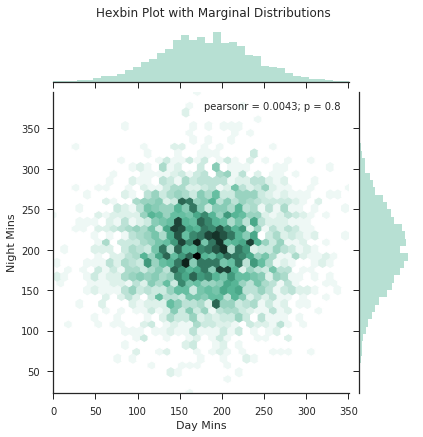

In [8]:
sns.set(style="ticks")


sns.jointplot(new_churn_df['Day Mins'],new_churn_df['Night Mins'], kind="hex", color="#4CB391")
plt.suptitle('Hexbin Plot with Marginal Distributions',fontsize=12,verticalalignment='bottom')
plt.show()

Pros: Contains a hexagon scatterplot along with Pearsn Correlation.  In this plot, Night Minutes does not depend on Day Minutes.  I like the marginal histograms on the side and top.

Cons: Can be hard to see outliers.

### Choose One Continuous and One Discrete Variable and Graph Them Six Ways ###

We use "Int'l Plan" and "Intl Mins" as our variables.

In [33]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

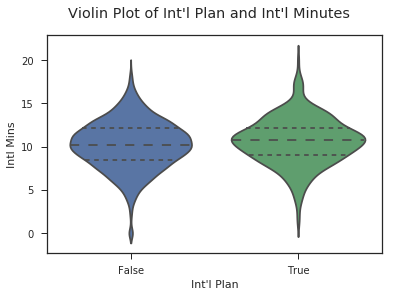

In [38]:
plt.suptitle("Violin Plot of Int'l Plan and Int'l Minutes")
sns.violinplot(x="Int'l Plan", y="Intl Mins", data=new_churn_df, inner="quart")

Pros: We can see that the Int'l Plan does not appear to change peoples use of International Minutes.  Allows us to directly see the Kernel density estimators of the split dataset.
Cons:  Not as easy to locate outliers as Boxplots

In [37]:
sns.set(style="ticks")

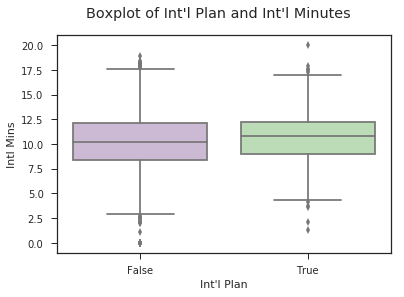

In [39]:
plt.suptitle("Boxplot of Int'l Plan and Int'l Minutes")
sns.boxplot(x="Int'l Plan", y="Intl Mins", data=new_churn_df, palette="PRGn")

Pro: We can now see outliers clearly

Cons: More abstract and less sylized than KDE's'

In [40]:
sns.set(style="whitegrid")

### ANOVA FACTOR PLOT ###

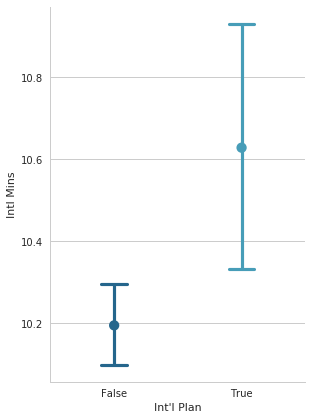

In [45]:

g = sns.factorplot(x="Int'l Plan", y="Intl Mins", data=new_churn_df,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)

Pros: We can see a clearer distinction of difference in means between the International Call use for those customer in the international calling plan.

Cons: Only shows means and standard deviations.

In [46]:
sns.set(style="white", palette="muted", color_codes=True)

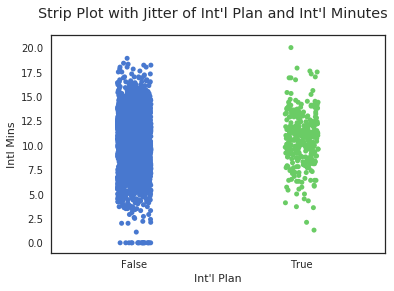

In [48]:
plt.suptitle("Strip Plot with Jitter of Int'l Plan and Int'l Minutes")
sns.stripplot(x="Int'l Plan", y="Intl Mins", data=new_churn_df, jitter=True)

Pros: Jitters the data help with the visualization of seeing the individual data points.

Cons:  Might seem a little unfamiliar at first.

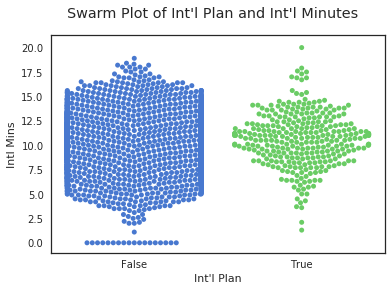

In [50]:
plt.suptitle("Swarm Plot of Int'l Plan and Int'l Minutes")
sns.swarmplot(x="Int'l Plan", y="Intl Mins", data=new_churn_df);

Pros: Interesting new way to plot.  Gives an interesting visual twist to distributions.

Cons: People might think it is too strange and unfamiliar.

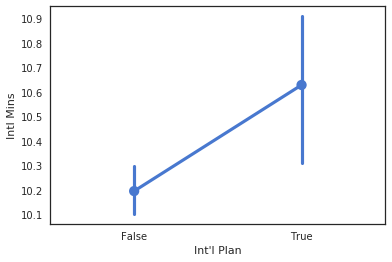

In [52]:
sns.pointplot(x="Int'l Plan", y="Intl Mins", data=new_churn_df);

Pros: Represents data with mean and the confidence interval of the mean estimate.  Allows you to easily see significance of difference in mean.

Cons: Loses all other information in the dataset.

## Bonus Question ##

We will analyze the churn variable with "Night Charge", "Eve Charge", "Day Charge", and "Intl Charge" variables.

In [53]:
sns.set(style="ticks", color_codes=True)

In [55]:
to_keep = ["Churn?","Eve Charge", "Day Charge", "Night Charge", "Intl Charge"]
new_df = churn_df[to_keep]

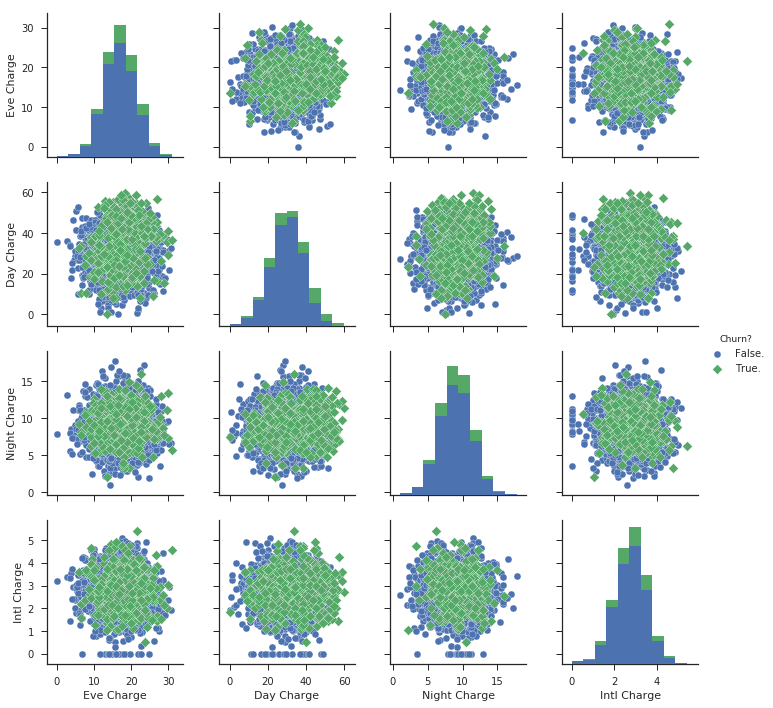

In [56]:
sns.pairplot(new_df, hue="Churn?", markers=["o", "D"])

The amount of phone charge by time frame does not appear significantly different between individuals which have left (churned) versus those who have stayed. 